<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-file-for-the-isotopes-module" data-toc-modified-id="Example-file-for-the-isotopes-module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example file for the isotopes module</a></span></li><li><span><a href="#peptides" data-toc-modified-id="peptides-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>peptides</a></span></li></ul></div>

## Example file for the isotopes module
This notebook presents how the isotopes.py module can be used to predict MS spectra of peptides, including some Post Translationnal Modifications

In [1]:
%matplotlib inline
import isotopes as iso

## peptides

straight pirmary sequences using 1 letter code is interpreted, a few PTM are available, check `iso.parse_peptide?` for more information

KEL0 = "KELCKAVSVSM"
KEL1 = "K+ELCKAVSVSM"  # + is for protonation
KEL2 = "KELCKAVS*VSM"  # * is for phosphorylation

In [2]:
iso.parse_peptide?

In [3]:
seq = "IEANPHILIPPE"
form = iso.parse(seq)

`iso.parse_peptide(seq)` returns a `Formula`, an object handling generic chemical formula.

It has a methods for computing masses and isotopic distribution, as well as printing itself :

In [5]:
print (form)

C_62 H_99 N_15 O_18


Average and monoisotopic peptide masses

assuming no charge

In [6]:
print (form.average(), form.monoisotop())

1342.5415971006046 1341.72925139901


Let's compute $m/z$ for varying level of protonation

In [7]:
m = form.monoisotop()
for i in range(1,5):
    print( "Z=%d  M/Z = %f"%(i,(m+i)/i))

Z=1  M/Z = 1342.729251
Z=2  M/Z = 671.864626
Z=3  M/Z = 448.243084
Z=4  M/Z = 336.432313


`Formula` can be created easily with `iso.parse_formula()`

It is easy to a groupment to a given formula using `addformula()`

In [8]:
iso.addformula(form, iso.parse_formula("PO3"))
m = form.monoisotop()
for i in range(1,4):
    print ("Z=%d  M/Z = %f"%(i,(m+i)/i))

Z=1  M/Z = 1421.687757
Z=2  M/Z = 711.343878
Z=3  M/Z = 474.562586


But the operation is wrong, because adding a phosphate requires removing a proton,

one way to do it :

In [9]:
seq = "KELCKAVS*VSM"
form = iso.parse_peptide(seq)
m = form.monoisotop()
for i in range(1,4):
    print ("Z=%d  M/Z = %f"%(i,(m+i)/i))

Z=1  M/Z = 1272.565496
Z=2  M/Z = 636.782748
Z=3  M/Z = 424.855165


Another, more convoluted way :

In [10]:
seq = "KELCKAVSVSM"
form = iso.parse_peptide(seq)
# fist add a full phosphate molecule
iso.addformula(form, iso.parse_formula("HPO4"))
# removing a groupement (here water group)
iso.rmformula(form, iso.parse_formula("H2O"))
m = form.monoisotop()
for i in range(1,5):
    print( "Z=%d  M/Z = %f"%(i,(m+i)/i))
    

Z=1  M/Z = 1272.565496
Z=2  M/Z = 636.782748
Z=3  M/Z = 424.855165
Z=4  M/Z = 318.891374


You can compute isotopic distribution, and even draw them

1271.565496  100.0000000000
1272.568326  62.1659202331
1273.568208  31.8682498442
1274.569089  11.7329790414
1275.569679  3.6072198284
1276.570512  0.9360617347
1277.571490  0.2114745485
1278.572655  0.0422176168
1279.573951  0.0075497937
1280.575368  0.0012228117
1281.576835  0.0001802931



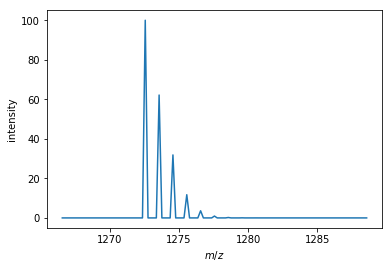

In [11]:
D = form.distribution()
print (D)
D.draw()

In [12]:
AA = "ACDEFGHIKLMNPQRSTVYW"
len(AA)
for a in AA:
    print (a,iso.parse_peptide(a).monoisotop())

A 89.04767846841
C 121.01974946841
D 133.03750770752998
E 147.05315777167
F 165.07897859668998
G 75.03202840427
H 155.06947654215
I 131.09462866082998
K 146.10552769769998
L 131.09462866082998
M 149.05104959669
N 132.05349212484
P 115.06332853255
Q 146.06914218898
R 174.11167570729998
S 105.04259308797
T 119.05824315211001
V 117.07897859668999
Y 181.07389321624999
W 204.08987763355998
